# Tutorial 3.1.1

## 3.1.1.1

### Creating dataframes: reading data files or converting arrays

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

In [3]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [4]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


### Manipulating data

In [5]:
data.shape

(40, 8)

In [6]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [7]:
print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [8]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [10]:
groupby_gender = data.groupby('Gender')

In [11]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [12]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Exercise

In [14]:
data['VIQ'].mean()

112.35

In [15]:
data['Gender'].count()

40

In [19]:
groupby_gender['MRI_Count'].mean()

Gender
Female    862654.6
Male      954855.4
Name: MRI_Count, dtype: float64

### Plotting data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02be7fb8d0>,
      dtype=object)

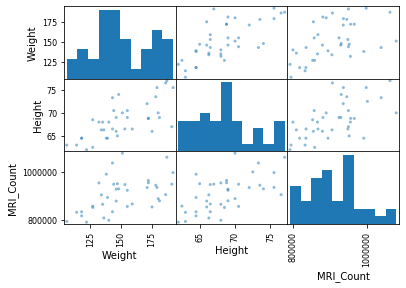

In [29]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02be3aac88>,
      dtype=object)

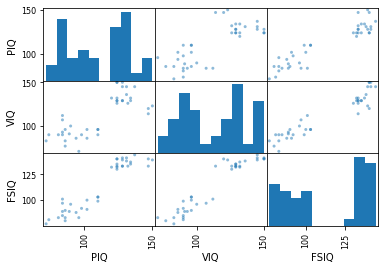

In [30]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02bdc006d8>,
      dtype=object)

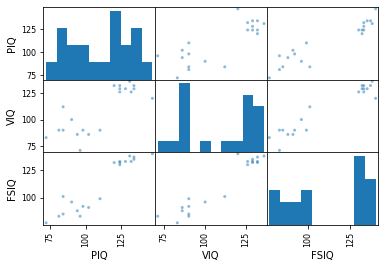

In [37]:
plotting.scatter_matrix(data[data['Gender'] == 'Female'][['PIQ', 'VIQ', 'FSIQ']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02bd6c27b8>,
      dtype=object)

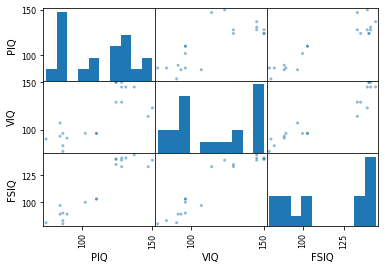

In [39]:
plotting.scatter_matrix(data[data['Gender'] == 'Male'][['PIQ', 'VIQ', 'FSIQ']])

# Tutorial 3.1.2

In [48]:
from scipy import stats

## 3.1.2.1

In [53]:
# 1-sample t-test: testing the value of a population mean

stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [54]:
# 2-sample t-test: testing for difference across populations

female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

## 3.1.2.2

In [55]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [56]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [57]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [58]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

# Tutorial 3.1.3

In [60]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

In [61]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           8.56e-08
Time:                        20:49:14   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### Categorical variables: comparing groups or multiple categories

In [69]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.445
Time:                        20:52:06   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [77]:
model = ols('VIQ ~ C(Gender)', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.445
Time:                        20:55:06   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.30

### Link to t-tests between different FSIQ and PIQ

In [79]:
import pandas
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [84]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.643
Time:                        20:58:25   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [87]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

## 3.1.3.2

In [90]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           1.58e-20
Time:                        21:06:04   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### 3.1.3.3. Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [91]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=array([[3.24533535]]), p=0.07369058781700653, df_denom=146, df_num=1>
